In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_spec.csv
/kaggle/input/jpx-tokyo-stock-

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

* Given that there are several datasets. We will do an EDA of each step by step beginning with


# Stock_list.csv

In [3]:
list = pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/stock_list.csv")
list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


* Primary observation shows several missing / NaN values. 


In [4]:
list.shape

(4417, 16)

* There are 4417 samples/instances and 16 features/columns

In [5]:
list.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95])

,SecuritiesCode,EffectiveDate,TradeDate,Close,IssuedShares,MarketCapitalization
count,4417.000000,4.417000e+03,4.121000e+03,4121.000000,4.121000e+03,4.121000e+03
mean,5547.191306,2.019758e+07,2.021123e+07,6376.734700,8.992267e+07,2.184400e+11
std,2499.027227,5.196842e+04,5.106468e-01,38091.520255,4.871675e+08,1.309481e+12
min,1301.000000,2.000010e+07,2.021122e+07,1.800000,2.242000e+03,3.878660e+07
5%,1697.800000,2.000010e+07,2.021123e+07,229.000000,1.014404e+06,1.842086e+09
10%,2159.600000,2.021123e+07,2.021123e+07,371.000000,2.130000e+06,2.709234e+09
25%,3423.000000,2.021123e+07,2.021123e+07,728.000000,5.944100e+06,5.912841e+09
50%,5711.000000,2.021123e+07,2.021123e+07,1397.000000,1.495007e+07,1.822500e+10
75%,7616.000000,2.021123e+07,2.021123e+07,2595.000000,4.267900e+07,6.811488e+10
90%,9012.800000,2.021123e+07,2.021123e+07,5150.000000,1.329600e+08,2.934941e+11


## Data Cleaning

In [6]:
list.isna().sum()

SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64

In [7]:
# New Market Segment
list["NewMarketSegment"].value_counts()

Prime Market                       1839
Standard Market                    1466
Growth Market                       461
Growth Market (Foreign Stock)         3
Standard Market (Foreign Stock)       2
Prime Market (Foreign Stock)          1
Name: NewMarketSegment, dtype: int64

* Seeing that Prime Market without Foreign Stock is most dominant, we will fill our missing values with it.

In [8]:
list["NewMarketSegment"] = list["NewMarketSegment"].fillna("Prime Market")
list["NewMarketSegment"].isna().sum()

0

In [9]:
# Trade Date
list["TradeDate"].value_counts()

20211230.0    4049
20211229.0      37
20211228.0      18
20211227.0       6
20211220.0       3
20211221.0       2
20211222.0       2
20211223.0       2
20211216.0       1
20211224.0       1
Name: TradeDate, dtype: int64

In [10]:
list["TradeDate"] = list["TradeDate"].fillna(list["TradeDate"].mean())
list["TradeDate"].isna().sum()

0

In [11]:
# Close
list.Close.value_counts()

3180.0    8
1007.0    8
3160.0    6
1000.0    6
766.0     6
         ..
1520.0    1
4640.0    1
2415.0    1
704.0     1
1488.0    1
Name: Close, Length: 2566, dtype: int64

In [12]:
list.Close = list.Close.fillna(list.Close.mean())
list.Close.isna().any()

False

In [13]:
# Issued Shares
list.IssuedShares = list.IssuedShares.fillna(list.IssuedShares.mean())
list.IssuedShares.isna().any()

False

In [14]:
# Market Capitalization
list.MarketCapitalization = list.MarketCapitalization.fillna(list.MarketCapitalization.mean())
list.MarketCapitalization.isna().any()

False

* Looking at `33SectorCode` and `17SectorCode` they seem to be represenetations of different sectors of the economy which have also been named so will just discard them.

In [15]:
list.drop(["33SectorCode", "17SectorCode"], axis = 1, inplace = True)
list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorName,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


# Visualization

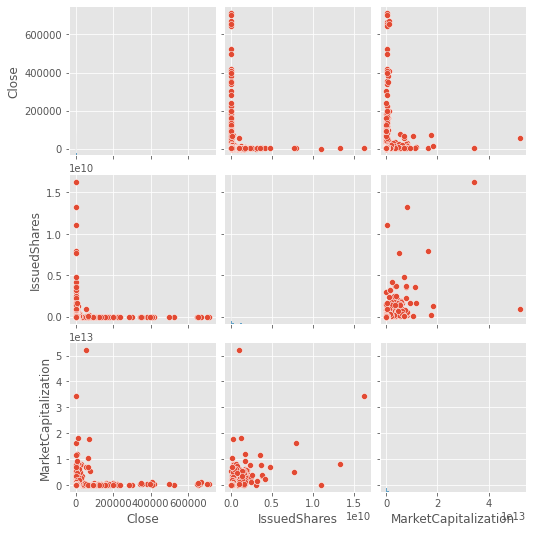

In [16]:
plt.style.use("ggplot")

# We will plot a Pairplot of the numerical features
list_num = ["Close", "IssuedShares", "MarketCapitalization"]
sns.pairplot(list[list_num])

<AxesSubplot:>

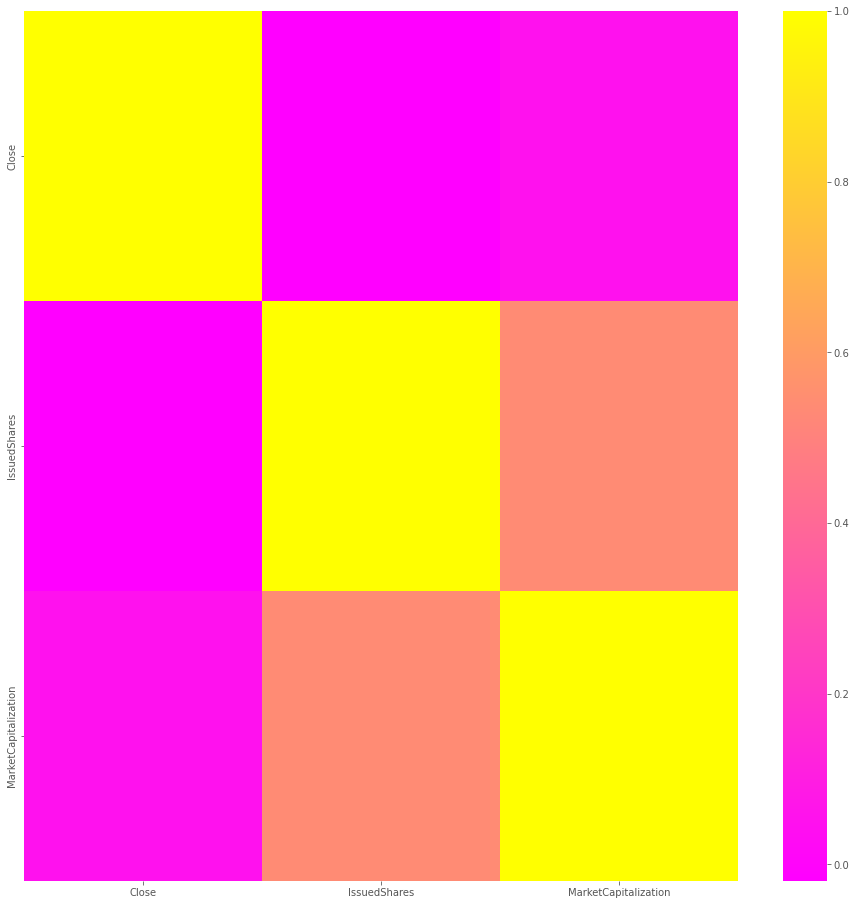

In [17]:
corr = list[list_num].corr()
f,ag=plt.subplots(figsize=(16,16))
sns.heatmap(corr, cmap="spring")

<Figure size 432x288 with 0 Axes>

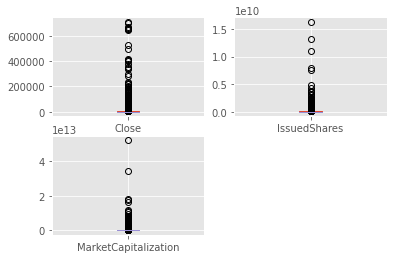

In [18]:
fig = plt.figure()
list[list_num].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'IssuedShares'}>],
       [<AxesSubplot:title={'center':'MarketCapitalization'}>,
        <AxesSubplot:>]], dtype=object)

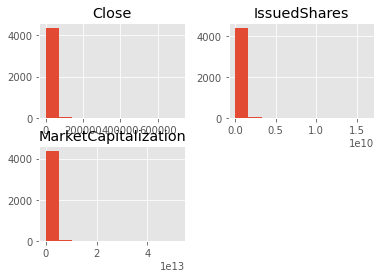

In [19]:
list[list_num].hist()

* Let us get an even keen look at every feature



# Close vs Date

In [20]:
list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorName,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,Prime Market,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [21]:
list.TradeDate.dtype

dtype('float64')

* Sometimes UNIX timestamps have to be converted to prevent them from changing to default

In [22]:
list['TradeDate'] = pd.to_datetime(list['TradeDate'].astype("int64"), format = "%Y%m%d").dt.strftime('%Y-%m-%d') 
list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorName,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,7,TOPIX Small 2,2021-12-30,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,44280.0,7.263200e+04,3.216145e+09,False


<AxesSubplot:xlabel='TradeDate'>

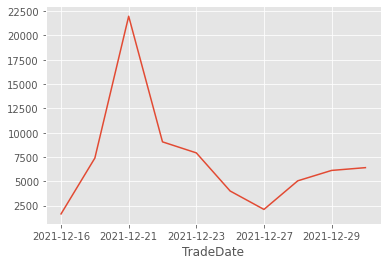

In [23]:
list.groupby("TradeDate")["Close"].mean().plot()

In [24]:
list['EffectiveDate'] = pd.to_datetime(list['EffectiveDate'].astype("int64"), format = "%Y%m%d").dt.strftime('%Y-%m-%d') 
list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorName,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,2021-12-30,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,"Fishery, Agriculture and Forestry",FOODS,7,TOPIX Small 2,2021-12-30,3080.0,1.092828e+07,3.365911e+10,True
1,1305,2021-12-30,Daiwa ETF-TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2097.0,3.634636e+09,7.621831e+12,False
2,1306,2021-12-30,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2073.5,7.917718e+09,1.641739e+13,False
3,1308,2021-12-30,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,2053.0,3.736943e+09,7.671945e+12,False
4,1309,2021-12-30,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,Prime Market,-,-,-,-,2021-12-30,44280.0,7.263200e+04,3.216145e+09,False


# Issued Shares v. Date

<AxesSubplot:xlabel='TradeDate'>

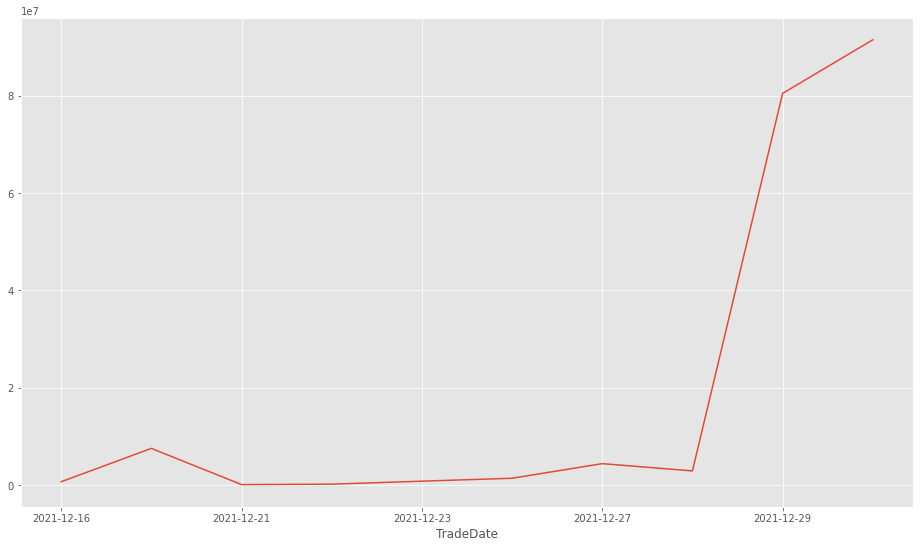

In [25]:
import seaborn as sns
plt.figure(figsize = (16,9)) 
list.groupby("TradeDate")["IssuedShares"].mean().plot()

# New Market Segment

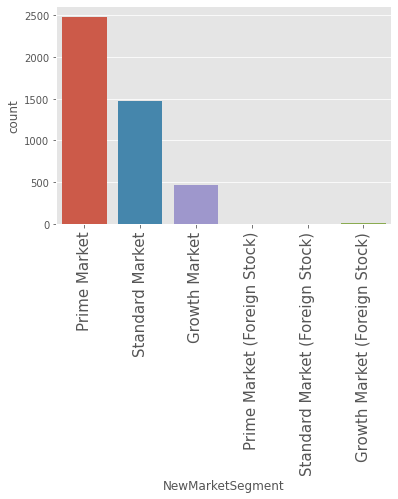

In [26]:
sns.countplot(list.NewMarketSegment)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90);

# Section/Products

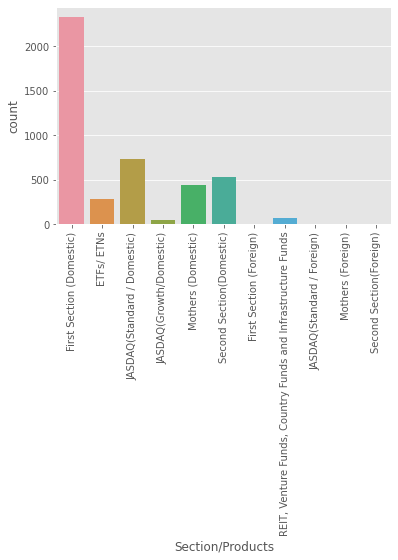

In [27]:
sns.countplot(list["Section/Products"])
plt.tick_params(axis="x", which = "major", rotation = 90);

In [28]:
shares = list.groupby("EffectiveDate")["IssuedShares"].sum().to_frame().reset_index()
shares

,EffectiveDate,IssuedShares
0,2000-01-01,2.571788e+10
1,2021-12-30,3.705713e+11
2,2022-01-04,1.798453e+08
3,2022-02-03,8.992267e+07
4,2022-02-04,8.992267e+07
5,2022-02-09,8.992267e+07
6,2022-02-17,8.992267e+07
7,2022-02-22,8.992267e+07
8,2022-02-24,8.992267e+07
9,2022-02-25,1.798453e+08


In [29]:
shares["EffectiveDate"] = pd.to_datetime(shares["EffectiveDate"])
shares["EffectiveDate"].head()

0   2000-01-01
1   2021-12-30
2   2022-01-04
3   2022-02-03
4   2022-02-04
Name: EffectiveDate, dtype: datetime64[ns]

In [30]:
import calendar

shares["year"] = shares.EffectiveDate.dt.year
shares

,EffectiveDate,IssuedShares,year
0,2000-01-01,2.571788e+10,2000
1,2021-12-30,3.705713e+11,2021
2,2022-01-04,1.798453e+08,2022
3,2022-02-03,8.992267e+07,2022
4,2022-02-04,8.992267e+07,2022
5,2022-02-09,8.992267e+07,2022
6,2022-02-17,8.992267e+07,2022
7,2022-02-22,8.992267e+07,2022
8,2022-02-24,8.992267e+07,2022
9,2022-02-25,1.798453e+08,2022


# Shares v. Years

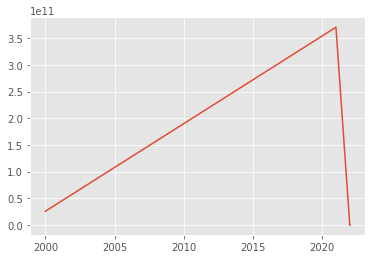

In [31]:
plt.plot(shares["year"], shares["IssuedShares"]);

In [32]:
list.TradeDate.value_counts()

2021-12-30    4049
2021-12-29     333
2021-12-28      18
2021-12-27       6
2021-12-20       3
2021-12-21       2
2021-12-22       2
2021-12-23       2
2021-12-16       1
2021-12-24       1
Name: TradeDate, dtype: int64

# Company v. Market Capitalization

In [33]:
cap = list.groupby("MarketCapitalization")["Name"].value_counts().to_frame()
cap

,,Name
MarketCapitalization,Name,
3.878660e+07,UBS ETF MSCI EMU Small Cap UCITS ETF-JDR,1
5.564400e+07,JPX-Nikkei 400 Bear -1x Inverse ETF,1
1.124100e+08,iShares Euro Investment Grade Corporate Bond JPY Hedged ETF,1
1.354074e+08,UBS ETF MSCI United Kingdom UCITS ETF-JDR,1
1.439060e+08,UBS ETF MSCI World UCITS ETF-JDR,1
...,...,...
1.641739e+13,NEXT FUNDS TOPIX Exchange Traded Fund,1
1.757905e+13,KEYENCE CORPORATION,1
1.825416e+13,SONY GROUP CORPORATION,1


# TODO
* Impute the missing values in `33 Sector` by finding the companies categories